# Suicide Data Analysis

Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based interventions can be implemented at population, sub-population and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.

Suicide is a global phenomenon; in fact, 79% of suicides occurred in low- and middle-income countries in 2016. Suicide accounted for 1.4% of all deaths worldwide, making it the 18th leading cause of death in 2016.

In 2017, a man whom I considered one of the greatest musicians of all time and author, or co-author, of a number of songs that had become the soundtrack of my life, died in suicide. Many were shocked, and many miss him today.The same tragic story repeated with three of the these heroes — Kurt Cobain, Robin Williams, and Anthony Bourdain. 

## Suicide Data

The Data that i am going to use is available on WHO's website. Looking at the data, you can observe long-time trends and differences between countries, as well as within countries across a few demographic groups - in both cases you will see that these differences may be very large.

The data will use foursquare api.


# Scope & Benefits of analysis

WHO has created this data over the years to see any kind of pattern among people who commit suicides. WHO runs various campaigns and programs across different countries. It needs to know where campaigns are more needed. If it doesn't know about where, which age group, to focus then WHO will allocate it's resources equally everywhere. This will not be efficient allocation of resources. 

Let's import libraries

In [8]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_1fee770219334bbcb8271d201ff12533 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Uc6YdFxqB-C31BJMV_Hcm1CkwkTtG6Kn484ZIMlcx0mD',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1fee770219334bbcb8271d201ff12533.get_object(Bucket='courseracapstone-donotdelete-pr-zdacazf4rsvhmx',Key='master.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data = pd.read_csv(body)
df_data.head()



,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


The Data has 12 columns. The generation column is based on 

In [9]:
df_data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

I would like to summarize the columns definition as below.
Columns Definition

1. year - Christian era.
2. age - The age is summarized within a certain range.
    5-14 years
    15-24 years
    25-34 years
    35-54 years
    55-74 years
    75+ years
3. suicides_no - Number of suicidals.
4. suicides/100k pop - Suicide by population of 100,000 people.
5. country-year - Combination of country and year.
6. HDI for year - The Human Development Index (HDI) is a simple indicator for measuring the average degree of accomplishment in a country regarding three aspects of human development: health, education, and income.
7. generation - Generations in America.
8. G.I. Generatio - 1900 - 1924
9. Silent - 1925 - 1942
10. Boomers - 1946 - 1964
11. Generation X - 1965 - 1980
12. Millenials - 1981 - 2000
13. Generation Z - 2001 - 2010


And there is a space in the name of column, which makes it difficult to handle.
Change the name of the column to make it easier.

In [10]:
df_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [11]:
df_data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'HDI_for_year',
       'gdp_for_year($)', 'gdp_per_capita($)', 'generation']

GDP of year is string. Let's change it to int

In [12]:
df_data['gdp_for_year($)'] = df_data['gdp_for_year($)'].str.replace(',','').astype('Int64')

Let's look for missing values

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k_pop    27820 non-null float64
country-year         27820 non-null object
HDI_for_year         8364 non-null float64
gdp_for_year($)      27820 non-null int64
gdp_per_capita($)    27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


HDI of the year has mostly null values. we can either drop that column or fill average values instead of missing

### let's import seaborn

In [32]:
!conda install -y -c anaconda seaborn=0.9.0
import seaborn as sns
import matplotlib.pyplot as plt

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - seaborn=0.9.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |           py35_1         139 KB  anaconda
    openssl-1.0.2r             |       h7b6447c_0         3.2 MB  anaconda
    seaborn-0.9.0              |           py35_0         378 KB  anaconda
    ca-certificates-2019.1.23  |                0         126 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.8 MB

The following packages will be UPDATED:

    ca-certificates: 2019.1.23-0          --> 2019.1.23-0       anaconda
    certifi:         2018.8.24-py35_1     --> 2018.8.24-py35_1  anaconda
    openssl:         1.0.2p-h14c3975_0    --> 1.0.2r-h7b6447c_0 anaconda
    seaborn:    

let's plot our data

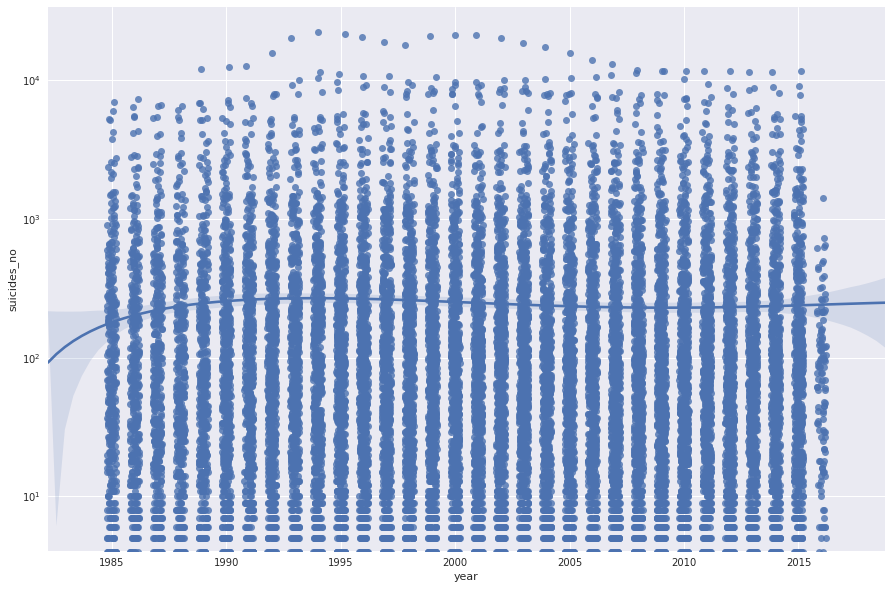

In [20]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.regplot(data=df_data, x='year', y='suicides_no', x_jitter=0.2, order=4)
ax.set_yscale('log')

The data above shows how many suicide numbers are there for every year 

Now let's take a look at which age group from which country has suicide victims

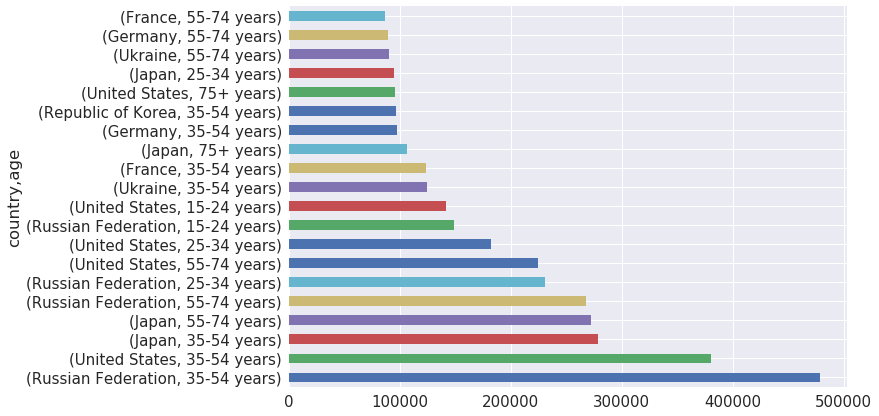

In [38]:
df_data.groupby(['country','age']).suicides_no.sum().nlargest(20).plot(kind='barh')

Clearly, you can see that Russian Federation has most cases of suicides followed by Unites States

Now, Let's see the graph of age group has how many cases of suicide

In [27]:
df_data['age'] = df_data.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))

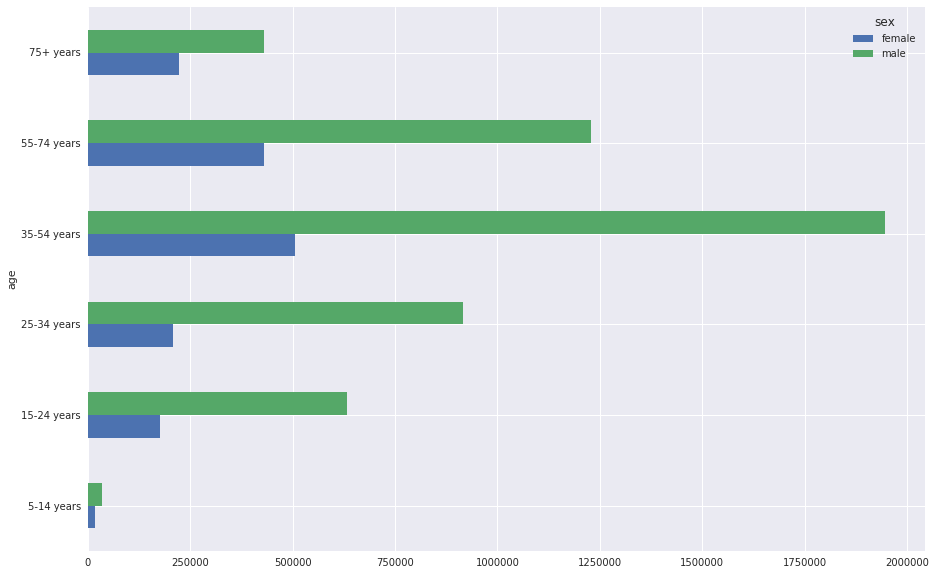

In [28]:
df_data.pivot_table(index='age',columns='sex',values='suicides_no', aggfunc='sum').plot(kind='barh')

By looking at the graph, we can say that people from age group 35-54 has a lot more cases than other age groups. Males have much more cases of suicide in that age group as compared to females.

Let's see the stacked graph of the same

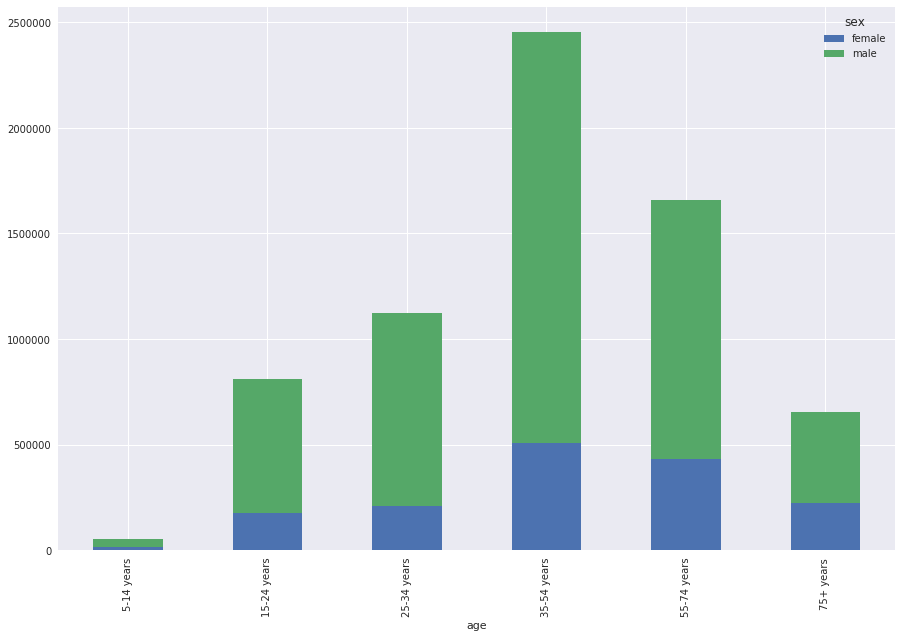

In [29]:
df_data.groupby(by=['age','sex'])['suicides_no'].sum().unstack().plot(kind='bar',stacked=True)

Let's see the insights drawn from the heatmap based on country, year and suicides

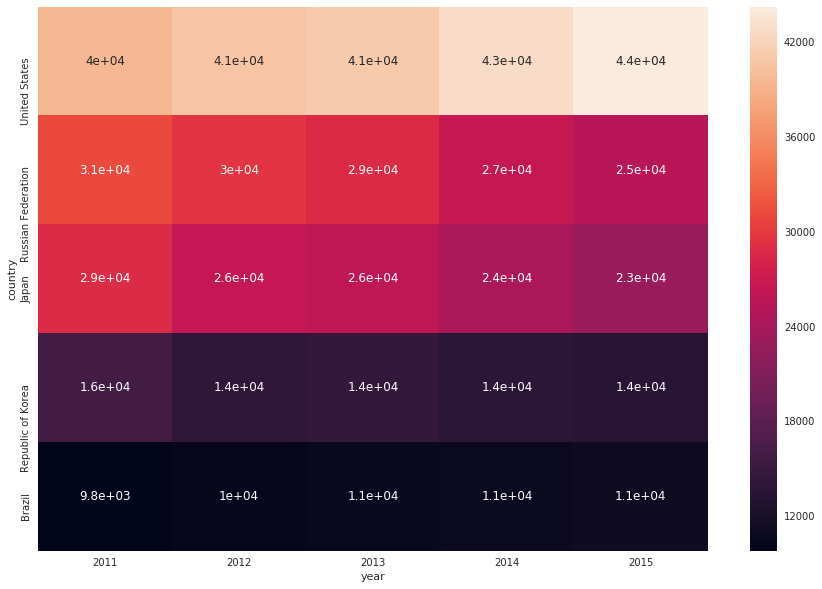

In [34]:
p = pd.crosstab(index=df_data.country,columns=df_data.year,values=df_data.suicides_no,aggfunc='sum')

sns.heatmap(p.loc[:,2011:2015].sort_values(2015, ascending=False).dropna().head(5),annot=True)

pp = pd.crosstab(index=df_data.country,columns=df_data.year,values=df_data.population,aggfunc='sum')

pdivpp = p/pp*10000


we can see that United states has more cases of suicides in recent years than any other country. 
Every other country shown has decreasing number of cases over the recent years but united states has increasing number of cases.

Let's look at this bar graph. It depicts the number of suicide over these years for these nations

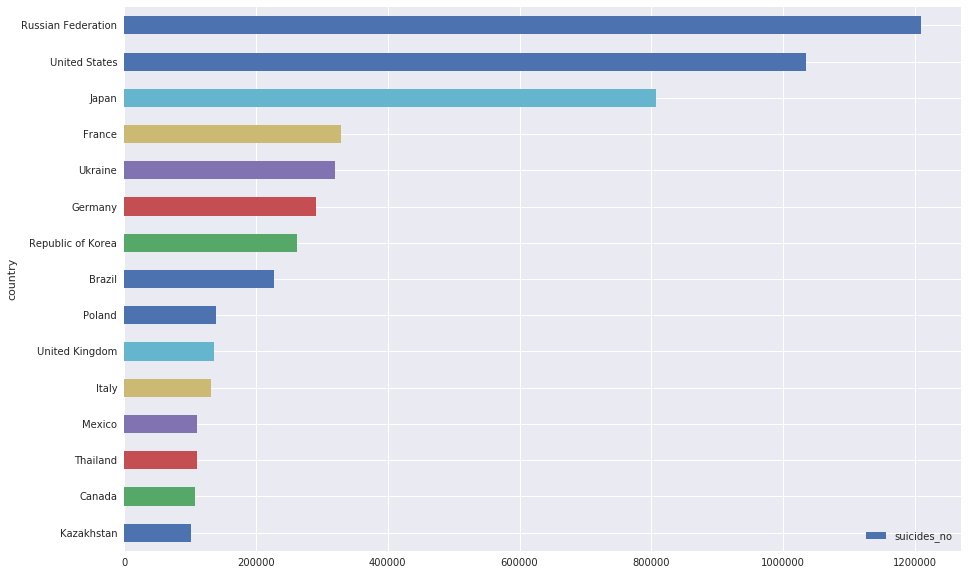

In [35]:
df_data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(15).plot(x='country',y='suicides_no',kind='barh')

Russian Federation has maximum number of suicide cases

Now let's look at suicide numbers based on sex

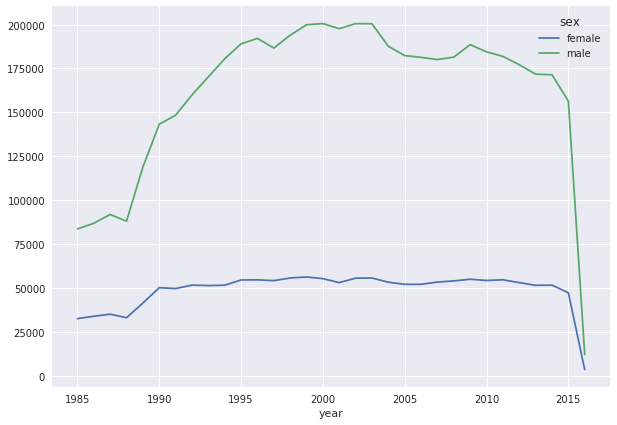

In [36]:
sns.set(rc={'figure.figsize':(10,7)})
df_data.pivot_table(index='year',columns='sex',values='suicides_no', aggfunc='sum').plot()

The graph depicts that males have much more cases compared to females. It is also to note that female cases have been more constant over the years compared to males.

Rest of the analysis and the report is in week 5 project